In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [2]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [6]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm

# 1. Decision Tree

+ 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
+ 설명하기 좋은 알고리즘
+ 과적합 문제
+ 균일도 측정 방식
    - entropy를 이용한 Information Gain 지수(ID3알고리즘)
    - gini 계수 : 0(평등) -> 1(불평등)


+ Graphviz
    - http://www.graphviz.org 에서 프로그램 다운로드 및 설치
        - jupyter notebook 재실행
        
    - pip install graphviz

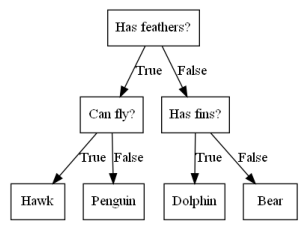

In [4]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz\bin"

mglearn.plots.plot_animal_tree()

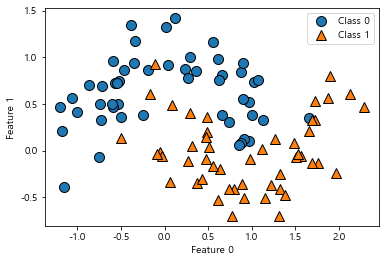

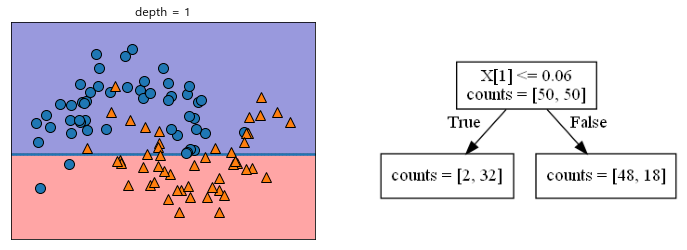

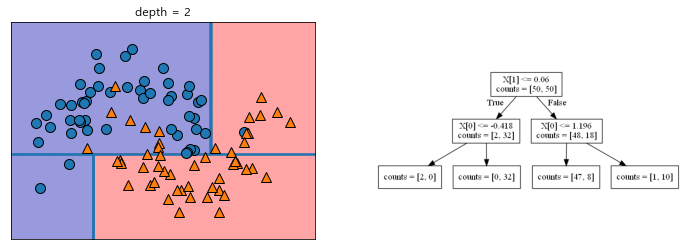

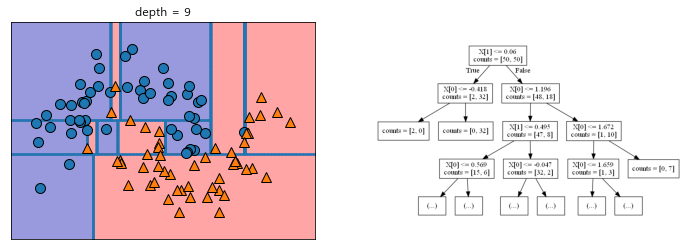

In [5]:
mglearn.plots.plot_tree_progressive()

### (1) 간단한 예

In [7]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                   random_state=11)

dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)

In [9]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

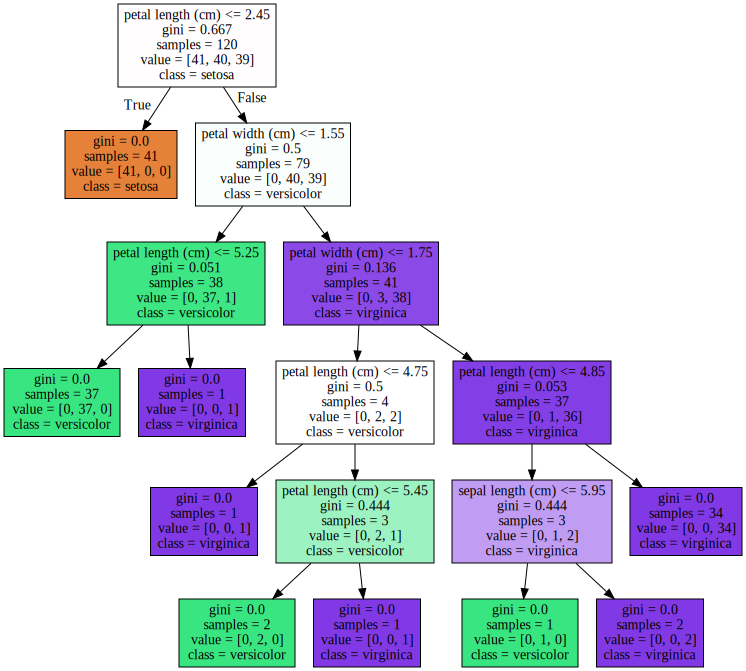

In [16]:
import graphviz 

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

In [14]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8666666666666667


### (2) 복잡도 제어 : Prunning(가지치기)

+ 종류
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원
    

+ 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features
    - max_depth
    - max_leaf_nodes

In [15]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                   random_state=11)

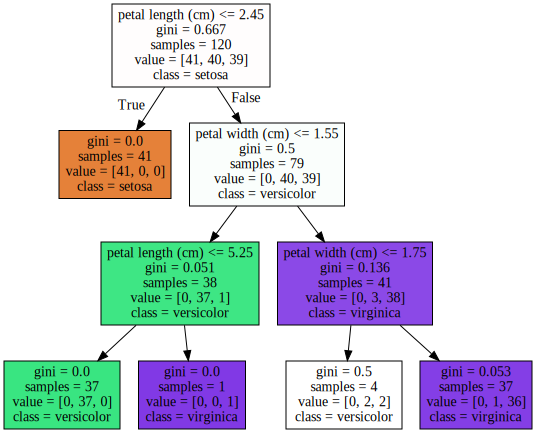

In [17]:
##### max_depth
dt_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

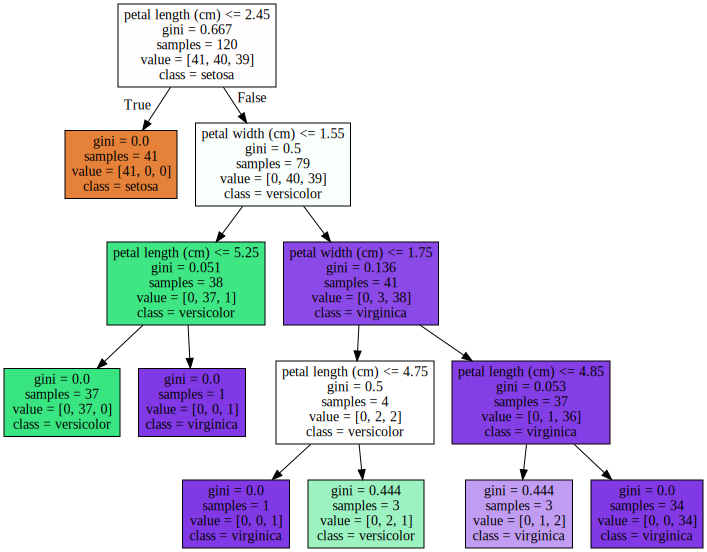

In [18]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

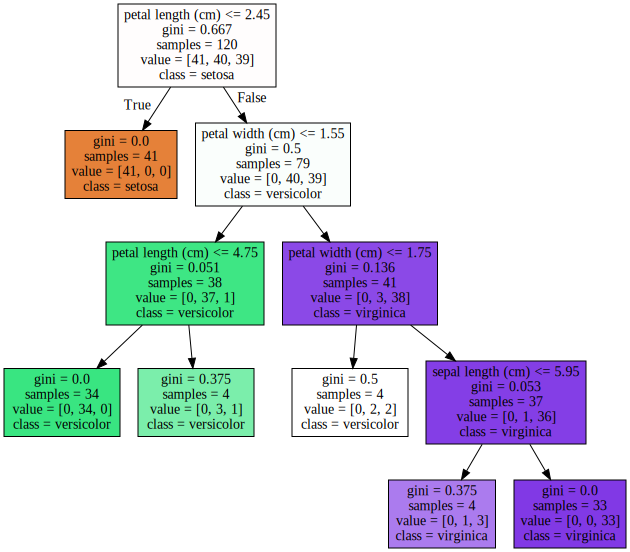

In [19]:
##### min_samples_leaf : 리프노드가 되기위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)